<a href="https://colab.research.google.com/github/Sujan-Sawant/Hotel_Booking_Analysis/blob/main/Project_4_Hotel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem

##### In recent years,City hotel and resort hotel have seen high cancellation rates.Each hotel is now dealing with number of issues as a result,incluiding fewer revenues and less than ideal hotel room use.Consequently,Lowering cancellation rate is both hotels is primary goal in order to increase their efficiency in generating revenue,and for us to offer through business advise to address this problem.


#### Research Question

#####1) What are the variables that affect hotel reservation cancellation?
#####2) How can we make hotel reservations cancellation better?
#####3) How will hotels be assisted in making pricing and promotional decisions?

#### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load The Dataset


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Sujan-Sawant/Hotel_Booking_Analysis/main/Hote_Booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,07-09-2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [ ]:
# Check no of rows and column
df.shape

(119390, 36)

#### Exploratory Data Analysis and Data Cleaning

In [ ]:
# Each column and their data type
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Covert reservation_status_date  column datatype from object to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [ ]:
df=df[df['adr']<5000]

In [ ]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119389,119389,119389,118901,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3,81502,115888,119389,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79329,13877,92309,48589,56477,97869,85993,74052,104641,89612,75166,48,6,1,28


In [ ]:
# Get unique values for each object column
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())
  print("-"*80)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [ ]:
# Get missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Delete unwanted columns and missing values column
df.drop(['agent','company'],axis=1,inplace=True)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Data Analysis and Visualization

#### # 1. Geographical Distribution of Guests:

In [ ]:
# 1. Geographical Distribution of Guests:
top_countries = df['country'].value_counts().head(10)
print(top_countries)

country
PRT    48585
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64


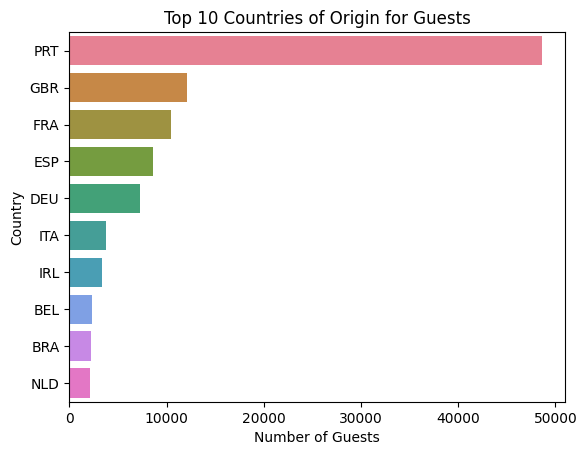

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Geographical Distribution of Guests:
top_countries = df['country'].value_counts().head(10)


# Custom color palette with 10 different colors
custom_palette = sns.color_palette("husl", 10)

# Top Countries Visualization with custom color palette
sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_palette)
plt.title('Top 10 Countries of Origin for Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Country')
plt.show()


#### 2 Counting bookings per month

In [ ]:
bookings_per_month =df['arrival_date_month'].value_counts()
bookings_per_month

arrival_date_month
August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9738
February      8012
November      6752
December      6728
January       5874
Name: count, dtype: int64

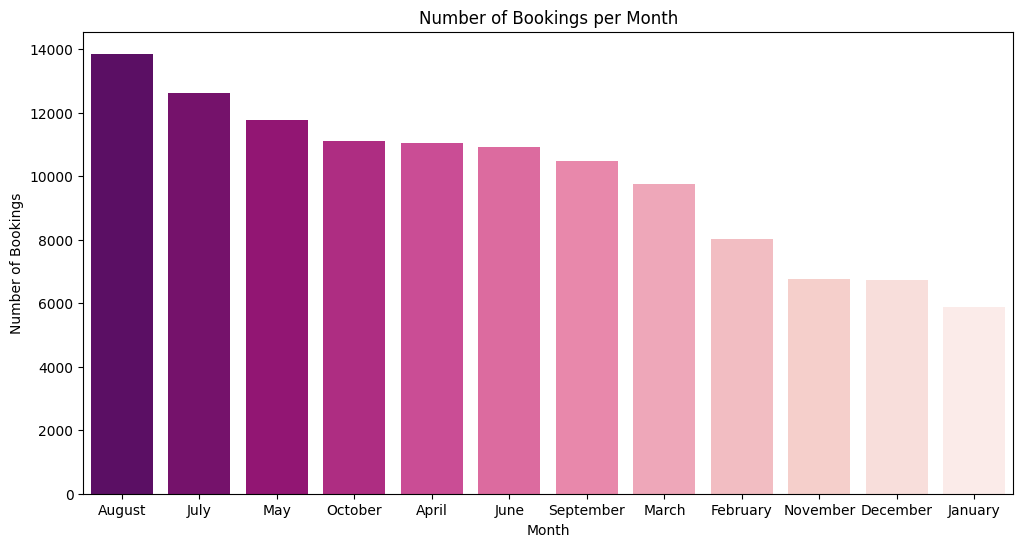

In [ ]:
# Plotting bookings per month
plt.figure(figsize=(12, 6))
sns.barplot(x=bookings_per_month.index, y=bookings_per_month.values,
            palette=sns.color_palette("RdPu", len(bookings_per_month))[::-1])

plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

#### 3 Cancellation Percentage

In [ ]:
# Check cancellation percentage
cancellation_Percentage=df["is_canceled"].value_counts(normalize=True) # normalize=True Returns percentage
cancellation_Percentage

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

In [ ]:
# 62 pecentage are not cancelled
# 37 percent are cancellation rate

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


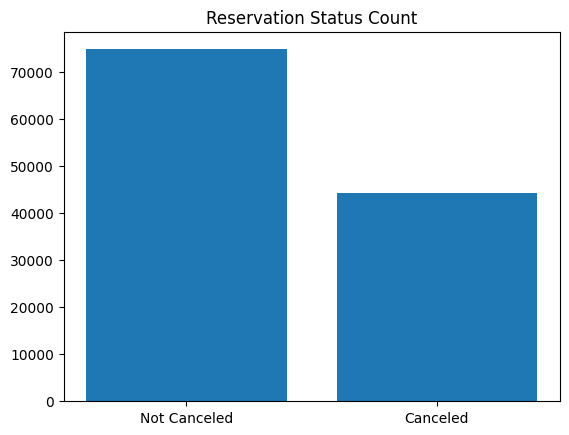

In [ ]:
print(cancellation_Percentage)
plt.title("Reservation Status Count")
plt.bar(["Not Canceled","Canceled"],df["is_canceled"].value_counts())
plt.show()

#### The Above bar graph shows the count of reservation that are canceled and those are not.There is huge bar for clients who cancel their reservation which impact on hotels earning.

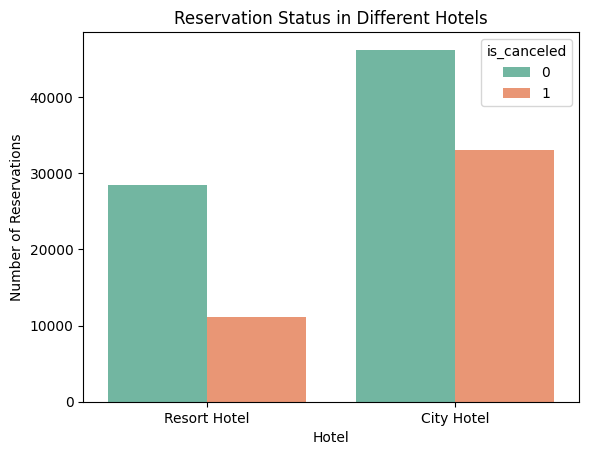

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with a different color palette
Ax = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="Set2")


# Set title and axis labels
plt.title("Reservation Status in Different Hotels")
plt.xlabel("Hotel")
plt.ylabel("Number of Reservations")

# Show the plot
plt.show()


#### In comparision to resort hotel city hotels have more booking.It is possible beacuse resort hotels more expensive than those of city hotels.

In [ ]:
#Booking and Cancellation in each month
import plotly.express as px

df['month'] = df['reservation_status_date'].dt.month

# Create the count plot using Plotly Express
fig = px.histogram(df, x='month', color='is_canceled', barmode='group',
                   title='Reservation Status Per Month',
                   labels={'month': 'Month', 'is_canceled': 'Cancellation Status', 'count': 'Number of Reservations'})

# Show the plot
fig.show()


#### I have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status.As can be seen, both number of confirm reservations and canceled reservations are largest in the month of **August**. Whereas **January** is the month with most cancel reservations.

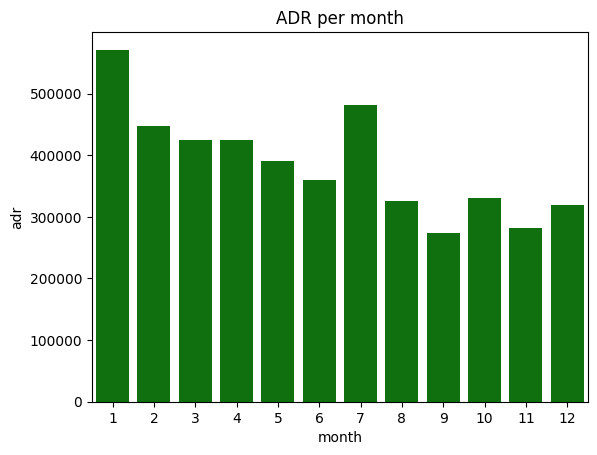

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame where 'is_canceled' column equals 1
canceled_bookings_df = df[df['is_canceled'] == 1]

monthly_adr_sum = canceled_bookings_df.groupby("month")['adr'].sum().reset_index()

# Plot the ADR per month
plt.title("ADR per month")
sns.barplot(x='month', y='adr', data=monthly_adr_sum,color='green')
plt.show()


#### This bar graph demonstrates that the cancellations are most common when prices are greatest and are least common when they are lowes.Therefore cost of accomodation is purely responsible for cancellation.

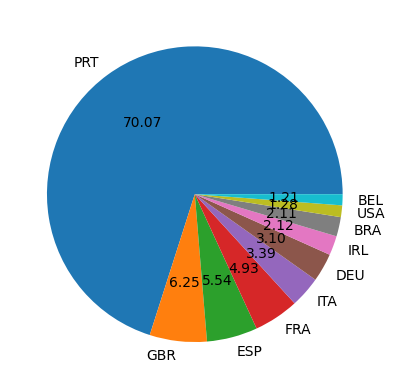

In [ ]:
Cancelled_data=df[df['is_canceled']==1]
top_10_Country=Cancelled_data['country'].value_counts()[:10]

plt.pie(top_10_Country,autopct='%.2f',labels=top_10_Country.index)
plt.title=("Top 10 Countries with Canceled Reservation")
plt.show()

#### The above pie chart shows the contries which has highest reservation canceled.**Portugal** is the top country with highest number of cancellations.

In [ ]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [ ]:
# normalize=True gives percentage
booking_percent_market_segment=df['market_segment'].value_counts(normalize=True)
booking_percent_market_segment


market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

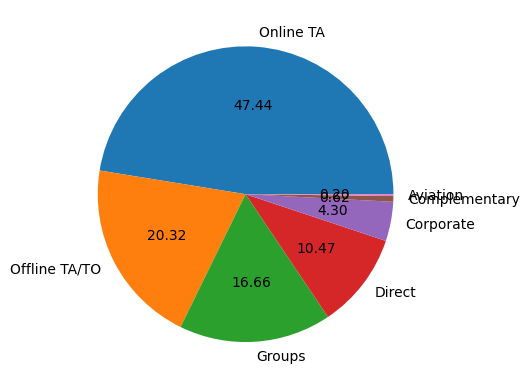

In [ ]:

plt.pie(booking_percent_market_segment, labels=booking_percent_market_segment.index, autopct='%.2f')

plt.show()


#### This pie chart shows the area where guwsts are visiting the hotels and making reservations.Is it coming Direct or Groups,Online or Offline Travel Agents?.Around 46% of clients come from online travel agencies,whereas 27% come from group. Only 4% of clients book hotels directly by visiting them and making reservations.

In [ ]:
Cancellation_by_market_segment=Cancelled_data['market_segment'].value_counts(normalize=True)
Cancellation_by_market_segment


market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

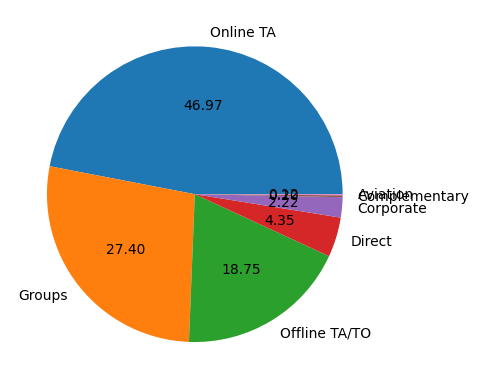

In [ ]:
plt.pie(Cancellation_by_market_segment,labels=Cancellation_by_market_segment.index,autopct='%.2f')
plt.show()

####This pie chart shows the area where guwsts are cancelling the hotels reservations.Around 47% of clients cancel their reservation which are booked through Online Travel Agents.27% clients cancels reservations by Group and around 19% of clients cancel their reservation which are booked through offline Travel Agents.

## Suggestions

####1) Cancellation rates rise as the price does.In order to prevent cancellation of reservations,hotels could work on their pricing stratigies and try to lower the rates for specific hotels based on locations. They Can also provide some discounts to the consumers.

#####2) As the ratio of cancellation and not cancellation of the resort hotel is higher than city hotels,So the hotels should provide a reasonable discount on the rooms prices on weekends or on holidays.

#####3) In the month of january hotels can start campaigns or marketing with reasonable amount of increase in their revenue as the cancellation is the higher in this month,

#####4) They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate their.